# Simulating MIMIC Patient
We used Biogears engine to simulate patients in MIMIC, initializing them using their readings in MIMIC, and administering IV fluids and vasopressors at each time step as done in MIMIC. We overrode the patient blood chemistry to simulate MIMIC readings. (See [SepsisSimulation_main.cpp](https://github.com/faaizT/core/blob/mimic-simulator/projects/howto/SimulationScripts/src/SepsisSimulation_main.cpp) for more details.)  

In [2]:
import pandas as pd
icustayid = 23870.0
biogears_output = '/Users/faaiz/exportdir-biogears/SimulateMIMIC_23870.000000_2021-02-20.00-55-29.csv'
mimic_csv = "/USers/faaiz/exportdir/MIMICtable-1hourly_entire-stay.csv"

In [3]:
simulation = pd.read_csv(biogears_output, dtype={"Piperacillin-BloodConcentration": str, "Tazobactam-BloodConcentration": str})
simulation.head()

,Time(s),HeartRate(1/min),MeanArterialPressure(mmHg),SystolicArterialPressure(mmHg),DiastolicArterialPressure(mmHg),CardiacOutput(mL/min),HemoglobinContent(g),CentralVenousPressure(mmHg),Hematocrit,ArterialBloodPH,...,RespirationRate(1/min),OxygenSaturation,CarbonDioxideSaturation,CoreTemperature(degC),SkinTemperature(degC),Bicarbonate-BloodConcentration(ug/mL),Creatinine-BloodConcentration(ug/mL),Lactate-BloodConcentration(mg/mL),Piperacillin-BloodConcentration,Tazobactam-BloodConcentration
0,1.0,109,93.2324,121.039,64.0269,9940.87,1317.64,4.50224,0.459768,7.37667,...,19.3548,1.23,0.039,36.9444,33.4205,1591.88,11.2934,0.614583,-1.$,-1.$
1,2.0,109,93.3105,121.109,64.1099,9937.76,1317.64,4.54024,0.459805,7.37667,...,19.3548,1.23,0.039,36.9444,33.4218,1591.84,11.2935,0.614583,0,0
2,3.0,109,93.3275,121.131,64.1201,9937.50,1317.64,4.55472,0.459857,7.37667,...,19.3548,1.23,0.039,36.9444,33.4231,1591.77,11.2948,0.614583,0,0
3,4.0,109,93.3252,121.129,64.1166,9937.76,1317.64,4.51767,0.459895,7.37667,...,19.3548,1.23,0.039,36.9444,33.4244,1591.73,11.2967,0.614583,0,0
4,5.0,109,93.3236,121.128,64.1157,9937.89,1317.64,4.49031,0.459915,7.37667,...,19.3548,1.23,0.039,36.9444,33.4256,1591.70,11.2984,0.614583,0,0


In [4]:
first_row = simulation.iloc[0].to_dict()
first_row['Time(s)'] = 0
simulation = pd.concat([pd.DataFrame([first_row]), simulation], ignore_index=True)
simulation.head()

,Time(s),HeartRate(1/min),MeanArterialPressure(mmHg),SystolicArterialPressure(mmHg),DiastolicArterialPressure(mmHg),CardiacOutput(mL/min),HemoglobinContent(g),CentralVenousPressure(mmHg),Hematocrit,ArterialBloodPH,...,RespirationRate(1/min),OxygenSaturation,CarbonDioxideSaturation,CoreTemperature(degC),SkinTemperature(degC),Bicarbonate-BloodConcentration(ug/mL),Creatinine-BloodConcentration(ug/mL),Lactate-BloodConcentration(mg/mL),Piperacillin-BloodConcentration,Tazobactam-BloodConcentration
0,0.0,109,93.2324,121.039,64.0269,9940.87,1317.64,4.50224,0.459768,7.37667,...,19.3548,1.23,0.039,36.9444,33.4205,1591.88,11.2934,0.614583,-1.$,-1.$
1,1.0,109,93.2324,121.039,64.0269,9940.87,1317.64,4.50224,0.459768,7.37667,...,19.3548,1.23,0.039,36.9444,33.4205,1591.88,11.2934,0.614583,-1.$,-1.$
2,2.0,109,93.3105,121.109,64.1099,9937.76,1317.64,4.54024,0.459805,7.37667,...,19.3548,1.23,0.039,36.9444,33.4218,1591.84,11.2935,0.614583,0,0
3,3.0,109,93.3275,121.131,64.1201,9937.50,1317.64,4.55472,0.459857,7.37667,...,19.3548,1.23,0.039,36.9444,33.4231,1591.77,11.2948,0.614583,0,0
4,4.0,109,93.3252,121.129,64.1166,9937.76,1317.64,4.51767,0.459895,7.37667,...,19.3548,1.23,0.039,36.9444,33.4244,1591.73,11.2967,0.614583,0,0


In [5]:
MIMICtable = pd.read_csv(mimic_csv)
MIMICtable.head()

,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
0,1.0,1006.0,4.330306e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,8166.0,4083.0,-8166.0,1.0
1,11.0,1006.0,4.330342e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,12249.0,4083.0,-12249.0,1.0
2,21.0,1006.0,4.330378e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.831461,240.000000,0.0,0.0,0.0,0.0,16332.0,4083.0,-16332.0,1.0
3,22.0,1006.0,4.330382e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.955357,96.000000,0.0,0.0,0.0,0.0,20415.0,4083.0,-20415.0,1.0
4,23.0,1006.0,4.330385e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.812749,109.714286,0.0,0.0,175.0,175.0,24298.0,3883.0,-24123.0,1.0


In [6]:
MIMICtable_filtered = MIMICtable[MIMICtable['icustay_id']==icustayid]
len(MIMICtable_filtered)

59

In [7]:
MIMICtable_filtered.insert(0,'Time(s)',MIMICtable_filtered['charttime']-MIMICtable_filtered['charttime'].values[0])

In [8]:
MIMICtable_filtered.head()

,Time(s),bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
791,0.0,1.0,23870.0,4.273863e+09,0.0,25623.837569,3.0,0.0,1.0,1.0,...,0.888060,204.999992,0.0,0.0,0.0,0.0,5754.0,2877.0,-5754.0,1.0
792,10800.0,4.0,23870.0,4.273874e+09,0.0,25623.837569,3.0,0.0,1.0,1.0,...,1.229665,218.750000,0.0,0.0,0.0,0.0,8631.0,2877.0,-8631.0,1.0
793,36000.0,11.0,23870.0,4.273899e+09,0.0,25623.837569,3.0,0.0,1.0,1.0,...,1.061947,81.249999,0.0,0.0,0.0,0.0,11508.0,2877.0,-11508.0,1.0
794,46800.0,14.0,23870.0,4.273910e+09,0.0,25623.837569,3.0,0.0,1.0,1.0,...,1.229665,218.750000,0.0,0.0,0.0,0.0,14385.0,2877.0,-14385.0,1.0
795,68400.0,20.0,23870.0,4.273931e+09,0.0,25623.837569,3.0,0.0,1.0,1.0,...,1.229665,218.750000,0.0,0.0,405.0,405.0,15612.0,1227.0,-15207.0,1.0


In [9]:
simulation = simulation[simulation['Time(s)'].isin(MIMICtable_filtered['Time(s)'])]

In [10]:
time = simulation['Time(s)']
diaBP_biogears = simulation['DiastolicArterialPressure(mmHg)']
diaBP_mimic = MIMICtable_filtered['DiaBP']

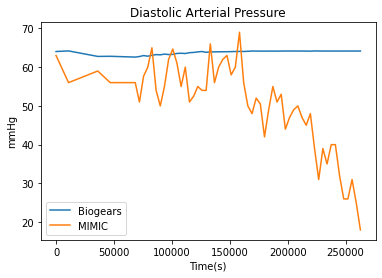

In [11]:
import matplotlib.pyplot as plt
plt.plot(time, diaBP_biogears)
plt.plot(time, diaBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Diastolic Arterial Pressure')
plt.legend(['Biogears', 'MIMIC'])
plt.show()

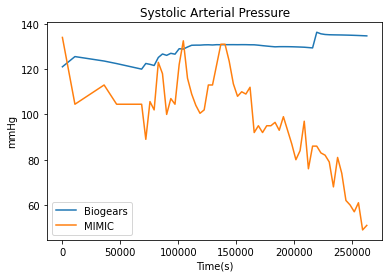

In [12]:
sysBP_biogears = simulation['SystolicArterialPressure(mmHg)']
sysBP_mimic = MIMICtable_filtered['SysBP']
plt.plot(time, pd.to_numeric(sysBP_biogears))
plt.plot(time, sysBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Systolic Arterial Pressure')
plt.legend(['Biogears', 'MIMIC'])
plt.show()

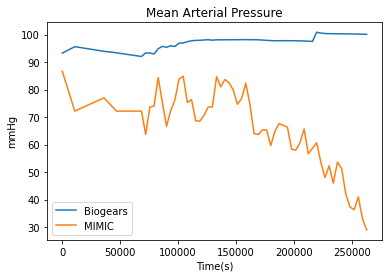

In [13]:
meanBP_biogears = simulation['MeanArterialPressure(mmHg)']
meanBP_mimic = MIMICtable_filtered['MeanBP']
plt.plot(time, pd.to_numeric(meanBP_biogears))
plt.plot(time, meanBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Mean Arterial Pressure')
plt.legend(['Biogears', 'MIMIC'])
plt.show()

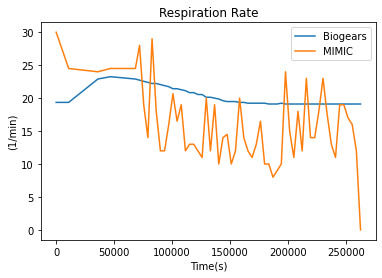

In [14]:
RR_biogears = simulation['RespirationRate(1/min)']
RR_mimic = MIMICtable_filtered['RR']
plt.plot(time, pd.to_numeric(RR_biogears))
plt.plot(time, RR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('(1/min)')
plt.title('Respiration Rate')
plt.legend(['Biogears', 'MIMIC'])
plt.show()

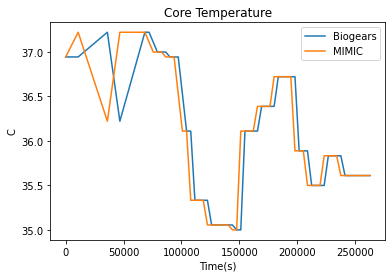

In [15]:
# We overrode the Core Temperature values which explains why they agree
temp_biogears = simulation['CoreTemperature(degC)']
temp_mimic = MIMICtable_filtered['Temp_C']
plt.plot(time, pd.to_numeric(temp_biogears))
plt.plot(time, temp_mimic)
plt.xlabel('Time(s)')
plt.ylabel('C')
plt.title('Core Temperature')
plt.legend(['Biogears', 'MIMIC'])
plt.show()

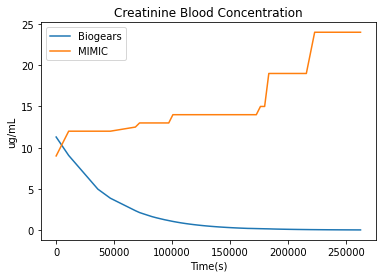

In [16]:
creatinine_biogears = simulation['Creatinine-BloodConcentration(ug/mL)']
creatinine_mimic = MIMICtable_filtered['Creatinine']*10
plt.plot(time, pd.to_numeric(creatinine_biogears))
plt.plot(time, creatinine_mimic)
plt.xlabel('Time(s)')
plt.ylabel('ug/mL')
plt.title('Creatinine Blood Concentration')
plt.legend(['Biogears', 'MIMIC'])
plt.show()

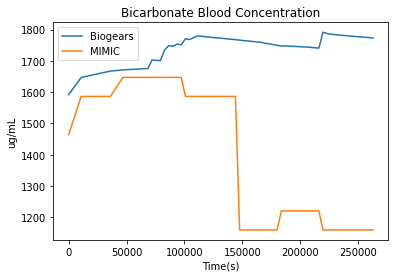

In [17]:
bicarbonate_biogears = simulation['Bicarbonate-BloodConcentration(ug/mL)']
bicarbonate_mimic = MIMICtable_filtered['HCO3']*61.0168
plt.plot(time, pd.to_numeric(bicarbonate_biogears))
plt.plot(time, bicarbonate_mimic)
plt.xlabel('Time(s)')
plt.ylabel('ug/mL')
plt.title('Bicarbonate Blood Concentration')
plt.legend(['Biogears', 'MIMIC'])
plt.show()